<a href="https://colab.research.google.com/github/bodohelgahannelora-lab/Bioinformatika/blob/main/GA_bev_algoritmusok_colab_alap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# BIOINFORMATIKA - Hátizsák pakolás
**Feladat:** Hátizsák pakolás, genetikus algoritmussal

* Adott n darab tárgy, mindegyiknek ismert a súlya s = (s1, s2, . . . , sn) és az értéke v = (v1, v2, . . . , vn).
* Célunk, hogy egy ismert C ∈ R+ teherbírású hátizsákba minél nagyobb
összértékű tárgyakat pakoljunk be.
* Mivel minden egyes tárgy vagy bekerül vagy nem, ezért összesen 2n féle pakolás lehetséges.
* A brute force megoldás az összeset végignézi, ez exponenciálisnál is rosszabb futásidőt jelent.
*  Ha n nagy akkor keresnünk kell jobb megoldást. Létezik egy dinamikus programozást alkalmazó eljárás, amellyel polinomidőben megoldható a feladat, ha a súlyok egészek.
* A mi esetünkben azonban más megoldást kell keresnünk, ezért ezen a feladaton keresztül megismerkedünk az evolúciós algoritmusokkal.

**Genetikus algoritmus:**
* Reprezentáció: egy n hosszú 0 − 1 sorozat. Ha az i. pozícióba 0-t írunk, akkor azon tárgy nem kerül be a hátizsákba, ha 1-et, akkor bekerül
* Fitnesz: a bekerült tárgyak összértéke, ha a súlykorlát alatt vagyunk, nulla egyébként. /Cél: ennek a maximalizálása/
* Egyed: egy lehetséges pakolás
* Populáció: lehetséges pakolások egy részhalmaza, ismétlődés előfordulhat köztük
* Genotípus: az egyedet leíró 0 − 1 sorozat
* Fenotípus: egy konkrét pakolás




---
LABOR / FELADATOK CÉLJA

```
* Kombinatorikus optimalizálást (hátizsákprobléma)
* Populációs heurisztikát (genetikus algoritmus)
* Elitizmust (a legjobb megoldások megtartása)
* Mutáció és keresztezés hatásának bemutatása
* Fitness görbék értelmezése

```

---



PSEUDOKÓD



```
# ---- Alapadatok ----
N = 30
weights = [1,10,1,10,...]           # páros index: 10, páratlan: 1
values  = [10,1,10,1,...]           # páratlan index: 10, páros: 1
capacity = 2.5 * N                  # 75

generations = 100                   # generációk száma
pop_size = 30                       # populációméret
p_cross = 0.9                       # keresztezés valószínűsége
p_mut = 0.01                        # mutáció valószínűsége (bitenként)
elit = 4                            # elit egyedek száma (elitizmus)

# ---- Segédfüggvény: fitness ----
function fitness(x):
    total_weight = sum(weights[i] * x[i])
    total_value  = sum(values[i] * x[i])
    if total_weight <= capacity:
        return total_value
    else:
        return 0                     # ha túl nehéz, érvénytelen megoldás

# ---- Fő algoritmus ----
1. Hozz létre egy kezdő populációt: véletlen 0/1 vektorok (méret: pop_size)
2. Számítsd ki minden egyed fitness értékét

3. Ismételd generations-szor:
    a) Válaszd ki a legjobb elit darabot (elitizmus)
    b) Új egyedeket készíts:
        - Válass két szülőt (pl. véletlenül)
        - Ha rand() < p_cross → végezz egypontos keresztezést
        - Mindkét utódnál minden bitre:
              ha rand() < p_mut → bitet megfordít
        - Számítsd ki az utódok fitnessét
        - Add őket az új populációhoz
    c) Az új populációhoz add vissza az elit egyedeket
    d) A populáció = új populáció

4. A legjobb egyed az, amelyiknek a legnagyobb fitness értéke van

5. Rajzold ki:
    - átlagos fitness érték generációnként (kék)
    - legjobb fitness generációnként (zöld)

```
Magyarázat:

* x = bináris vektor, hogy mely tárgyakat teszed a hátizsákba.
* fitness(x) = a hátizsák összértéke, ha nem lépi túl a kapacitást.
* Keresztezés = két szülő vektor bitjeinek cseréje.
* Mutáció = néhány bit véletlenszerű megfordítása.
* Elitizmus = a legjobbak automatikusan továbbjutnak a következő generációba.












## Hogyan álljunk neki

Minden egyed egy bináris vektor → például:
x = [1, 0, 1, 0, 1, 0, ...]
ami azt jelenti: betettem az 1., 3., 5. tárgyat.


## Az értékelés (fitness)
```
összérték = sum(values[i] * x[i])
összsúly  = sum(weights[i] * x[i])
ha összsúly <= kapacitás → fitness = összérték
különben → fitness = 0  (vagy levonás)
```
A GA keresztezi és mutálja ezeket a bináris vektorokat, hogy új kombinációkat próbáljon ki.

Tárgyak száma: 30
```
Súlyok:  [1, 10, 1, 10, 1, 10, ...]
Értékek: [10, 1, 10, 1, 10, 1, ...]
Kapacitás: 75
```
Ez azt jelenti, hogy van sok könnyű, de értékes tárgy (1-esek), és néhány nehéz, de kevésbé értékes (10-esek). A GA megpróbálja kitalálni, melyiket érdemes betenni, hogy a hátizsák értéke minél nagyobb legyen.

## Hogyan működik?

* Kezdet: véletlen 0/1 megoldások (pl. 30 bit hosszú vektorok).
* Értékelés: kiszámítjuk, mennyi a teljes érték és súly.
* Szelekció: a jobb megoldásokat előnyben részesítjük.
* Keresztezés: két jó megoldásból új kombináció.
* Mutáció: kis véletlen változtatások, hogy ne ragadjunk bele.
* Elitizmus: a legjobb néhány megoldás mindig megmarad.
* Ismétlés: 100 generáción keresztül.

## Példa végeredményre

Végül a legjobb megoldás (legmagasabb fitness) → az optimális vagy majdnem optimális hátizsák-összeállítás.
```
Legjobb egyed (x):
[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]

Összsúly: 75
Összérték: 156
```

## FELADAT: KÉREK ELSŐRE MINDENKITŐL **SAJÁT** IMPLEMENTÁCIÓT
A saját implementációhoz adok egy alap kódót, hogy ha vki elakadna, legyen minimál segítség, de ez legyen csak iránymutatás a saját megoldáshoz.


Legjobb érték (fitness): 156
Összsúly: 75 / 75
Megoldás (0/1 vektor): [1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]


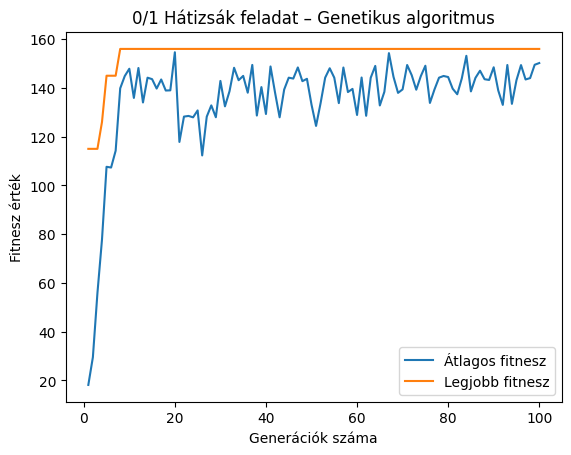

In [ ]:
# ===============================================
#  0/1 HÁTIZSÁK FELADAT GENETIKUS ALGORITMUSSAL
# ===============================================

import random
import matplotlib.pyplot as plt

# ---- 1. Probléma beállítása ----
N = 30                                # tárgyak száma
weights = [1 if i % 2 == 0 else 10 for i in range(N)]  # súlyok: 1,10,1,10,...
values  = [10 if i % 2 == 0 else 1  for i in range(N)] # értékek: 10,1,10,1,...
capacity = int(2.5 * N)               # hátizsák kapacitása (75)

# ---- 2. GA paraméterek ----
generations = 100
pop_size = 30
p_cross = 0.9                         # keresztezés valószínűsége
p_mut = 0.01                          # mutáció valószínűsége
elit = 4                              # elit egyedek száma
rnd = random.Random(42)               # véletlenszám-generátor (ismételhető)

# ---- 3. Fitnesz függvény ----
def fitness(x):
    total_weight = sum(w * xi for w, xi in zip(weights, x))
    total_value  = sum(v * xi for v, xi in zip(values, x))
    if total_weight <= capacity:
        return total_value            # érvényes megoldás
    else:
        return 0                      # túl nehéz megoldás – érvénytelen

# ---- 4. Alapműveletek ----
def random_solution():
    return [rnd.randint(0, 1) for _ in range(N)]

def crossover(a, b):
    cp = rnd.randint(1, N - 1)
    return a[:cp] + b[cp:], b[:cp] + a[cp:]

def mutate(x):
    return [1 - xi if rnd.random() < p_mut else xi for xi in x]

def tournament_select(pop, k=2):
    candidates = [rnd.choice(pop) for _ in range(k)]
    return max(candidates, key=lambda ind: ind["fit"])

# ---- 5. Populáció inicializálása ----
pop = [{"x": random_solution()} for _ in range(pop_size)]
for ind in pop:
    ind["fit"] = fitness(ind["x"])

# ---- 6. GA fő ciklus ----
avg_history, best_history = [], []

for g in range(generations):
    fits = [ind["fit"] for ind in pop]
    avg_history.append(sum(fits) / len(fits))
    best_history.append(max(fits))

    # a) elitizmus
    elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit]

    # b) új generáció létrehozása
    newpop = []
    while len(newpop) < pop_size - elit:
        p1 = tournament_select(pop)
        p2 = tournament_select(pop)
        if rnd.random() < p_cross:
            c1, c2 = crossover(p1["x"], p2["x"])
        else:
            c1, c2 = p1["x"][:], p2["x"][:]
        c1, c2 = mutate(c1), mutate(c2)
        newpop.append({"x": c1, "fit": fitness(c1)})
        if len(newpop) < pop_size - elit:
            newpop.append({"x": c2, "fit": fitness(c2)})

    # c) elit egyedek visszahelyezése
    pop = newpop + elites

# ---- 7. Eredmény ----
best = max(pop, key=lambda ind: ind["fit"])
best_weight = sum(w * xi for w, xi in zip(weights, best["x"]))
print("Legjobb érték (fitness):", best["fit"])
print("Összsúly:", best_weight, "/", capacity)
print("Megoldás (0/1 vektor):", best["x"])

# ---- 8. Grafikus ábrázolás ----
plt.plot(range(1, generations + 1), avg_history, label="Átlagos fitnesz")
plt.plot(range(1, generations + 1), best_history, label="Legjobb fitnesz")
plt.xlabel("Generációk száma")
plt.ylabel("Fitnesz érték")
plt.title("0/1 Hátizsák feladat – Genetikus algoritmus")
plt.legend()
plt.show()



In [51]:
#Értékek amelyek segítenek az ellenőrző feladatok megoldásában

import random


rnd = random.Random(44)
# p_cross = 0.85
# p_mut = 0.015
# elit = 4

## 1) FELADAT (könnyű) – Eredeti feladat kicsit módosítva


```
* N = 40
* Súlyok: [2, 9, 2, 9, …]
* Értékek: [9, 2, 9, 2, …]
* Kapacitás: 0.45 * sum(weights)
* GA: gen=120, pop=40, pc=0.85, pm=0.015, elit=4
```
Cél: találd meg a legjobb érvényes 0/1 megoldást; hasonlítsd a kihozott értéket a greedy (érték/súly szerint) megoldáshoz.

--- Genetikus algoritmus eredménye ---
Legjobb érték (fitness): 192
Összsúly: 94 / 99
Megoldás (0/1 vektor): [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]
Kihasználtság: 94.95%

--- Mohó algoritmus eredménye ---
Legjobb érték (fitness): 192
Összsúly: 94 / 99
Megoldás (0/1 vektor): [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
Kihasználtság: 94.95%


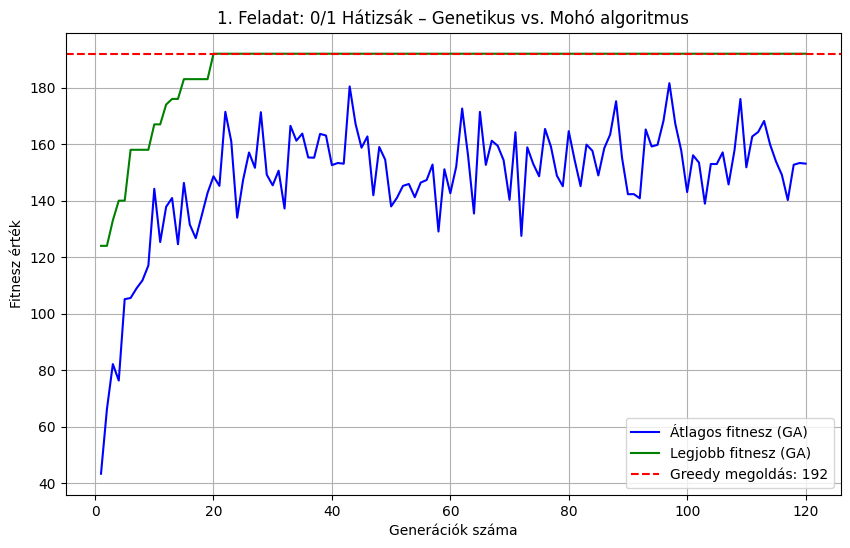

In [32]:
import random
import matplotlib.pyplot as plt

N = 40
weights = [2 if i % 2 == 0 else 9 for i in range(N)]
values  = [9 if i % 2 == 0 else 2  for i in range(N)]

total_possible_weight = sum(weights)
capacity = int(0.45 * total_possible_weight)

generations = 120
pop_size = 40
p_cross = 0.85
p_mut = 0.015
elit = 4
# rnd = random.Random(42)

def fitness(x):
    total_weight = sum(w * xi for w, xi in zip(weights, x))
    total_value  = sum(v * xi for v, xi in zip(values, x))
    if total_weight <= capacity:
        return total_value
    else:
        return 0

def random_solution():
    return [rnd.randint(0, 1) for _ in range(N)]

def crossover(a, b):
    cp = rnd.randint(1, N - 1)
    return a[:cp] + b[cp:], b[:cp] + a[cp:]

def mutate(x):
    return [1 - xi if rnd.random() < p_mut else xi for xi in x]

def tournament_select(pop, k=2):
    candidates = [rnd.choice(pop) for _ in range(k)]
    return max(candidates, key=lambda ind: ind["fit"])

pop = [{"x": random_solution()} for _ in range(pop_size)]
for ind in pop:
    ind["fit"] = fitness(ind["x"])

avg_history, best_history = [], []

for g in range(generations):
    fits = [ind["fit"] for ind in pop]
    avg_history.append(sum(fits) / len(fits))
    best_history.append(max(fits))

    elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit]

    newpop = []
    while len(newpop) < pop_size - elit:
        p1 = tournament_select(pop)
        p2 = tournament_select(pop)
        if rnd.random() < p_cross:
            c1, c2 = crossover(p1["x"], p2["x"])
        else:
            c1, c2 = p1["x"][:], p2["x"][:]
        c1, c2 = mutate(c1), mutate(c2)
        newpop.append({"x": c1, "fit": fitness(c1)})
        if len(newpop) < pop_size - elit:
            newpop.append({"x": c2, "fit": fitness(c2)})

    pop = newpop + elites

best_ga_solution = max(pop, key=lambda ind: ind["fit"])
best_ga_weight = sum(w * xi for w, xi in zip(weights, best_ga_solution["x"]))
print("--- Genetikus algoritmus eredménye ---")
print("Legjobb érték (fitness):", best_ga_solution["fit"])
print("Összsúly:", best_ga_weight, "/", capacity)
print("Megoldás (0/1 vektor):", best_ga_solution["x"])
print("Kihasználtság: {:.2f}%".format((best_ga_weight / capacity) * 100 if capacity > 0 else 0))


print("\n--- Mohó algoritmus eredménye ---")
items = []
for i in range(N):
    ratio = values[i] / weights[i]
    items.append({"index": i, "weight": weights[i], "value": values[i], "ratio": ratio})

items.sort(key=lambda x: x["ratio"], reverse=True)

greedy_solution_vector = [0] * N
greedy_total_weight = 0
greedy_total_value = 0
remaining_capacity = capacity

for item in items:
    if remaining_capacity >= item["weight"]:
        greedy_solution_vector[item["index"]] = 1
        greedy_total_weight += item["weight"]
        greedy_total_value += item["value"]
        remaining_capacity -= item["weight"]

print("Legjobb érték (fitness):", greedy_total_value)
print("Összsúly:", greedy_total_weight, "/", capacity)
print("Megoldás (0/1 vektor):", greedy_solution_vector)
print("Kihasználtság: {:.2f}%".format((greedy_total_weight / capacity) * 100 if capacity > 0 else 0))


plt.figure(figsize=(10, 6))
plt.plot(range(1, generations + 1), avg_history, label="Átlagos fitnesz (GA)", color='blue')
plt.plot(range(1, generations + 1), best_history, label="Legjobb fitnesz (GA)", color='green')
plt.axhline(y=greedy_total_value, color='red', linestyle='--', label=f'Greedy megoldás: {greedy_total_value}')
plt.xlabel("Generációk száma")
plt.ylabel("Fitnesz érték")
plt.title("1. Feladat: 0/1 Hátizsák – Genetikus vs. Mohó algoritmus")
plt.legend()
plt.grid(True)
plt.show()

## 2) FELADAT (közepes) – Korreltált (realisztikus) feladatfelvetés


```
* N = 60
* Súlyok: véletlen egész [1..15]
* Értékek: values[i] = weights[i] + U(0..5) (kisebb zaj)
* Kapacitás: 0.40 * sum(weights)
* GA: gen=150, pop=60, pc=0.9, pm=0.01, elit=6
```
Cél: vizsgáld meg, nő-e az átlagos fitnesz stabilan; dokumentáld a legjobb megoldás súlyát/értékét és a kihasználtságot (%).

--- Genetikus algoritmus eredménye (2. Feladat) ---
Legjobb érték (fitness): 285
Összsúly: 170 / 170
Kihasználtság: 100.00%


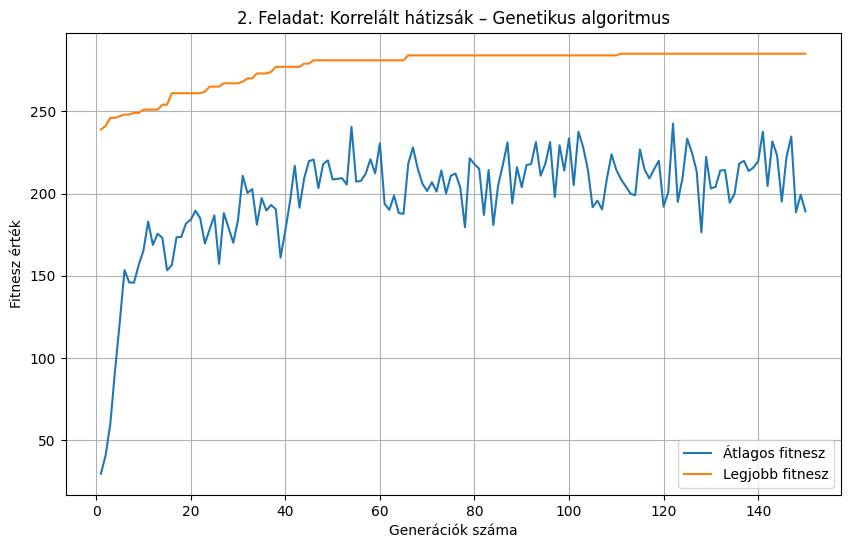

In [59]:
import random
import matplotlib.pyplot as plt

N = 60

rnd = random.Random(42)

weights = [rnd.randint(1, 15) for _ in range(N)]
values  = [weights[i] + rnd.randint(0, 5) for i in range(N)]

total_possible_weight = sum(weights)
capacity = int(0.40 * total_possible_weight)

generations = 150
pop_size = 60
p_cross = 0.9
p_mut = 0.01
elit = 6

def fitness(x):
    total_weight = sum(w * xi for w, xi in zip(weights, x))
    total_value  = sum(v * xi for v, xi in zip(values, x))
    if total_weight <= capacity:
        return total_value
    else:
        return 0

def random_solution():
    return [rnd.randint(0, 1) for _ in range(N)]

def crossover(a, b):
    cp = rnd.randint(1, N - 1)
    return a[:cp] + b[cp:], b[:cp] + a[cp:]

def mutate(x):
    return [1 - xi if rnd.random() < p_mut else xi for xi in x]

def tournament_select(pop, k=2):
    candidates = [rnd.choice(pop) for _ in range(k)]
    return max(candidates, key=lambda ind: ind["fit"])

pop = [{"x": random_solution()} for _ in range(pop_size)]
for ind in pop:
    ind["fit"] = fitness(ind["x"])

avg_history, best_history = [], []

for g in range(generations):
    fits = [ind["fit"] for ind in pop]
    avg_history.append(sum(fits) / len(fits))
    best_history.append(max(fits))

    elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit]

    newpop = []
    children_to_generate = pop_size - elit
    while len(newpop) < children_to_generate:
        p1 = tournament_select(pop)
        p2 = tournament_select(pop)
        if rnd.random() < p_cross:
            c1, c2 = crossover(p1["x"], p2["x"])
        else:
            c1, c2 = p1["x"][:], p2["x"][:]

        c1 = mutate(c1)
        newpop.append({"x": c1, "fit": fitness(c1)})

        if len(newpop) < children_to_generate:
            c2 = mutate(c2)
            newpop.append({"x": c2, "fit": fitness(c2)})

    pop = newpop + elites

best_ga_solution = max(pop, key=lambda ind: ind["fit"])
best_ga_weight = sum(w * xi for w, xi in zip(weights, best_ga_solution["x"]))

print("--- Genetikus algoritmus eredménye (2. Feladat) ---")
print("Legjobb érték (fitness):", best_ga_solution["fit"])
print("Összsúly:", best_ga_weight, "/", capacity)
utilization = (best_ga_weight / capacity) * 100 if capacity > 0 else 0
print("Kihasználtság: {:.2f}%".format(utilization))

plt.figure(figsize=(10, 6))
plt.plot(range(1, generations + 1), avg_history, label="Átlagos fitnesz")
plt.plot(range(1, generations + 1), best_history, label="Legjobb fitnesz")
plt.xlabel("Generációk száma")
plt.ylabel("Fitnesz érték")
plt.title("2. Feladat: Korrelált hátizsák – Genetikus algoritmus")
plt.legend()
plt.grid(True)
plt.show()

Az átlag fitnez latszóan nő, az ábrán láthato az is hogy gyakran 50 fitnesz érték visszaesés is van, ezert nem feltétlenül mondanám stabilnak, de nagyon függ attól, hogy mit nevezünk "stabilnak".

## 3) FELADAT (közepes) – „Csapdás” elemek


```
* N = 50
* Súlyok: véletlen [1..12], minden 5. tétel súly=15
* Értékek: véletlen [1..10], minden 5. tétel érték=5 (rossz arány)
* Kapacitás: 0.33 * sum(weights)
* GA: gen=200, pop=50, pc=0.9, pm=0.015, elit=5, kiválasztás: 3-as torna
```
Cél: bizonyítsd, hogy a GA elkerüli a csapdát (5. elemek ritkán legyenek 1-ek a legjobban).

--- Genetikus algoritmus eredménye (3. Feladat) ---
Legjobb érték (fitness): 144
Összsúly: 149 / 150
Kihasználtság: 99.33%

--- Csapdás elemek elemzése ---
Összes csapdás elem: 10
Csapdás elemek száma a legjobb megoldásban: 0

A GA sikeresen elkerülte a csapdás elemek többségét.


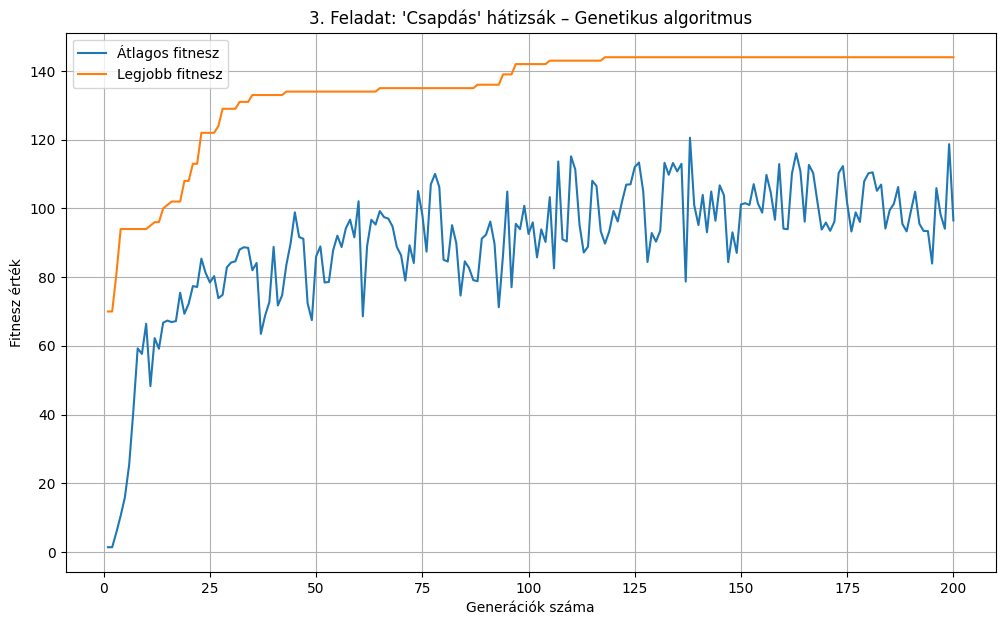

In [36]:
import random
import matplotlib.pyplot as plt

N = 50

weights = []
values = []

for i in range(N):
    if (i + 1) % 5 == 0:
        weights.append(15)
        values.append(5)
    else:
        weights.append(random.randint(1, 12))
        values.append(random.randint(1, 10))

total_possible_weight = sum(weights)
capacity = int(0.33 * total_possible_weight)

generations = 200
pop_size = 50
p_cross = 0.9
p_mut = 0.015
elit = 5
# rnd = random.Random(42)

def fitness(x):
    total_weight = sum(w * xi for w, xi in zip(weights, x))
    total_value  = sum(v * xi for v, xi in zip(values, x))
    if total_weight <= capacity:
        return total_value
    else:
        return 0

def random_solution():
    return [rnd.randint(0, 1) for _ in range(N)]

def crossover(a, b):
    cp = rnd.randint(1, N - 1)
    return a[:cp] + b[cp:], b[:cp] + a[cp:]

def mutate(x):
    return [1 - xi if rnd.random() < p_mut else xi for xi in x]

def tournament_select(pop, k=3):
    candidates = [rnd.choice(pop) for _ in range(k)]
    return max(candidates, key=lambda ind: ind["fit"])

pop = []
for _ in range(pop_size):
    solution = random_solution()
    pop.append({"x": solution, "fit": fitness(solution)})

avg_history, best_history = [], []

for g in range(generations):
    fits = [ind["fit"] for ind in pop]
    avg_history.append(sum(fits) / len(fits))
    best_history.append(max(fits))

    elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit]

    newpop = []
    children_to_generate = pop_size - elit
    while len(newpop) < children_to_generate:
        p1 = tournament_select(pop)
        p2 = tournament_select(pop)
        if rnd.random() < p_cross:
            c1, c2 = crossover(p1["x"], p2["x"])
        else:
            c1, c2 = p1["x"][:], p2["x"][:]

        c1 = mutate(c1)
        newpop.append({"x": c1, "fit": fitness(c1)})

        if len(newpop) < children_to_generate:
            c2 = mutate(c2)
            newpop.append({"x": c2, "fit": fitness(c2)})

    pop = newpop + elites

best_ga_solution = max(pop, key=lambda ind: ind["fit"])
best_ga_weight = sum(w * xi for w, xi in zip(weights, best_ga_solution["x"]))

print("--- Genetikus algoritmus eredménye (3. Feladat) ---")
print("Legjobb érték (fitness):", best_ga_solution["fit"])
print("Összsúly:", best_ga_weight, "/", capacity)
utilization = (best_ga_weight / capacity) * 100 if capacity > 0 else 0
print("Kihasználtság: {:.2f}%".format(utilization))

print("\n--- Csapdás elemek elemzése ---")
trap_item_indices = [i for i in range(N) if (i + 1) % 5 == 0]
trap_item_count_in_solution = 0
for i in trap_item_indices:
    if best_ga_solution["x"][i] == 1:
        trap_item_count_in_solution += 1

print(f"Összes csapdás elem: {len(trap_item_indices)}")
print(f"Csapdás elemek száma a legjobb megoldásban: {trap_item_count_in_solution}")
if trap_item_count_in_solution < len(trap_item_indices) / 2:
    print("\nA GA sikeresen elkerülte a csapdás elemek többségét.")
else:
    print("\nA GA nem igazán kerülte el a csapdás elemeket.")

plt.figure(figsize=(12, 7))
plt.plot(range(1, generations + 1), avg_history, label="Átlagos fitnesz")
plt.plot(range(1, generations + 1), best_history, label="Legjobb fitnesz")
plt.xlabel("Generációk száma")
plt.ylabel("Fitnesz érték")
plt.title("3. Feladat: 'Csapdás' hátizsák – Genetikus algoritmus")
plt.legend()
plt.grid(True)
plt.show()


## 4) FELADAT (haladó) – Bounded knapsack (0/1/2 darab)


```
* N = 35
* Súlyok: [1..10] véletlen
* Értékek: [3..20] véletlen
* Kapacitás: 0.50 * sum(weights) (ha mindenből max 1 lenne)
* Döntési változó: x_i ∈ {0,1,2} (kódolás: 2 bit/item vagy egy 0/1/2 gén)
* GA: gen=180, pop=50, pc=0.85, pm=0.02, elit=5
```
Cél: alakítsd át a mutációt/keresztezést, hogy 0/1/2 értékeket kezeljen; használj repair-t, ha túlterhel.

--- Genetikus algoritmus eredménye (4. Feladat) ---
Legjobb érték (fitness): 420
Összsúly: 92 / 92
Kihasználtság: 100.00%


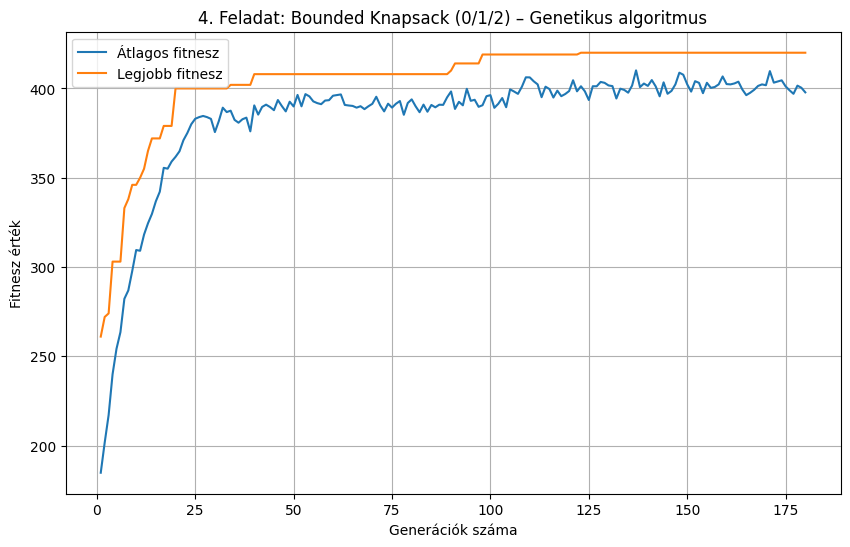

In [35]:
import random
import matplotlib.pyplot as plt

N = 35
weights = [random.randint(1, 10) for _ in range(N)]
values  = [random.randint(3, 20) for _ in range(N)]

total_possible_weight_if_one = sum(weights)
capacity = int(0.50 * total_possible_weight_if_one)

generations = 180
pop_size = 50
p_cross = 0.85
p_mut = 0.02
elit = 5
# rnd = random.Random(42)

def fitness(x):
    total_value  = sum(v * xi for v, xi in zip(values, x))
    return total_value

def random_solution():
    return [rnd.randint(0, 2) for _ in range(N)]

def crossover(a, b):
    cp = rnd.randint(1, N - 1)
    return a[:cp] + b[cp:], b[:cp] + a[cp:]

def mutate(x):
    mutated_x = list(x)
    for i in range(N):
        if rnd.random() < p_mut:
            possible_values = [0, 1, 2]
            possible_values.remove(mutated_x[i])
            mutated_x[i] = rnd.choice(possible_values)
    return mutated_x

def tournament_select(pop, k=3):
    candidates = [rnd.choice(pop) for _ in range(k)]
    return max(candidates, key=lambda ind: ind["fit"])

def repair_solution(solution_vector):
    current_solution = list(solution_vector)
    current_weight = sum(w * current_solution[i] for i, w in enumerate(weights))

    while current_weight > capacity:
        removable_items = [i for i, count in enumerate(current_solution) if count > 0]
        if not removable_items:
            break

        item_to_reduce_idx = rnd.choice(removable_items)

        current_solution[item_to_reduce_idx] -= 1
        current_weight -= weights[item_to_reduce_idx]

    return current_solution

pop = []
for _ in range(pop_size):
    individual_x = random_solution()
    repaired_x = repair_solution(individual_x)
    pop.append({"x": repaired_x, "fit": fitness(repaired_x)})

avg_history, best_history = [], []

for g in range(generations):
    fits = [ind["fit"] for ind in pop]
    avg_history.append(sum(fits) / len(fits))
    best_history.append(max(fits))

    elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit]

    newpop = []
    children_to_generate = pop_size - elit
    while len(newpop) < children_to_generate:
        p1 = tournament_select(pop)
        p2 = tournament_select(pop)
        if rnd.random() < p_cross:
            c1, c2 = crossover(p1["x"], p2["x"])
        else:
            c1, c2 = p1["x"][:], p2["x"][:]

        c1 = mutate(c1)
        c1 = repair_solution(c1) # Repair
        newpop.append({"x": c1, "fit": fitness(c1)})

        if len(newpop) < children_to_generate:
            c2 = mutate(c2)
            c2 = repair_solution(c2) # Repair
            newpop.append({"x": c2, "fit": fitness(c2)})

    pop = newpop + elites

best_ga_solution = max(pop, key=lambda ind: ind["fit"])
best_ga_weight = sum(w * best_ga_solution["x"][i] for i, w in enumerate(weights))

print("--- Genetikus algoritmus eredménye (4. Feladat) ---")
print("Legjobb érték (fitness):", best_ga_solution["fit"])
print("Összsúly:", best_ga_weight, "/", capacity)
utilization = (best_ga_weight / capacity) * 100 if capacity > 0 else 0
print("Kihasználtság: {:.2f}%".format(utilization))

plt.figure(figsize=(10, 6))
plt.plot(range(1, generations + 1), avg_history, label="Átlagos fitnesz")
plt.plot(range(1, generations + 1), best_history, label="Legjobb fitnesz")
plt.xlabel("Generációk száma")
plt.ylabel("Fitnesz érték")
plt.title("4. Feladat: Bounded Knapsack (0/1/2) – Genetikus algoritmus")
plt.legend()
plt.grid(True)
plt.show()

## 5) FELADAT (haladó) – 2D knapsack (súly + térfogat)


```
* N = 45
* Súlyok: [2..12], Térfogat: [1..8]
* Értékek: [5..20]
* Kapacitások: sum(weights)*0.45, sum(volumes)*0.50
* GA: gen=220, pop=60, pc=0.9, pm=0.012, elit=6, crossover: kétpontos
```
Cél: módosítsd a fitness-t, hogy mindkét korlátot betartsa (vagy büntesse külön-külön).

--- Genetikus algoritmus eredménye (5. Feladat) ---
Legjobb érték (fitness): 355
Összsúly: 136 / 137
Össztérfogat: 102 / 102
Súly kihasználtság: 99.27%
Térfogat kihasználtság: 100.00%


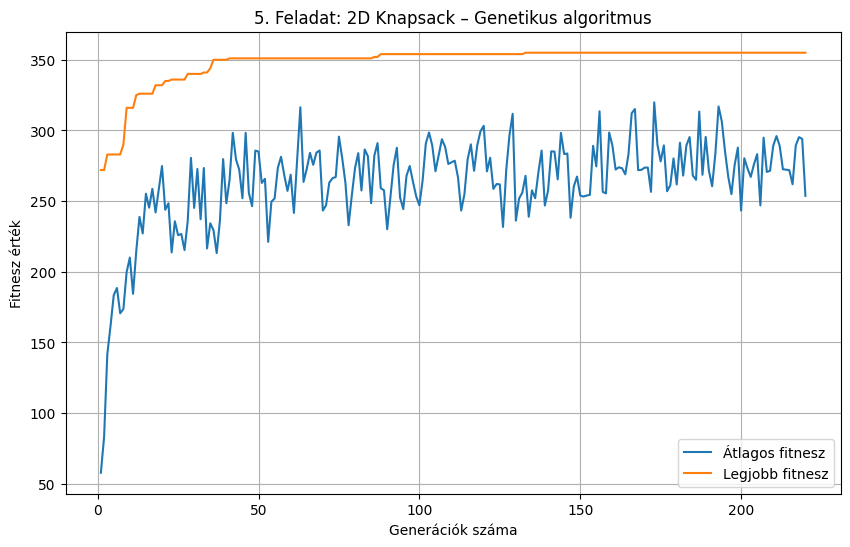

In [34]:
import random
import matplotlib.pyplot as plt

N = 45
weights = [random.randint(2, 12) for _ in range(N)]
volumes = [random.randint(1, 8) for _ in range(N)]
values  = [random.randint(5, 20) for _ in range(N)]

capacity_weight = int(sum(weights) * 0.45)
capacity_volume = int(sum(volumes) * 0.50)

generations = 220
pop_size = 60
p_cross = 0.9
p_mut = 0.012
elit = 6
# rnd = random.Random(42)

def fitness(x):
    total_weight = sum(w * xi for w, xi in zip(weights, x))
    total_volume = sum(vol * xi for vol, xi in zip(volumes, x))
    total_value  = sum(v * xi for v, xi in zip(values, x))

    if total_weight <= capacity_weight and total_volume <= capacity_volume:
        return total_value
    else:
        return 0

def random_solution():
    return [rnd.randint(0, 1) for _ in range(N)]

def crossover(a, b):
    cp1 = rnd.randint(1, N - 2)
    cp2 = rnd.randint(cp1 + 1, N - 1)

    c1 = a[:cp1] + b[cp1:cp2] + a[cp2:]
    c2 = b[:cp1] + a[cp1:cp2] + b[cp2:]
    return c1, c2

def mutate(x):
    return [1 - xi if rnd.random() < p_mut else xi for xi in x]

def tournament_select(pop, k=2):
    candidates = [rnd.choice(pop) for _ in range(k)]
    return max(candidates, key=lambda ind: ind["fit"])

pop = []
for _ in range(pop_size):
    solution = random_solution()
    pop.append({"x": solution, "fit": fitness(solution)})

avg_history, best_history = [], []

for g in range(generations):
    fits = [ind["fit"] for ind in pop]
    avg_history.append(sum(fits) / len(fits))
    best_history.append(max(fits))

    elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit]

    newpop = []
    children_to_generate = pop_size - elit
    while len(newpop) < children_to_generate:
        p1 = tournament_select(pop)
        p2 = tournament_select(pop)
        if rnd.random() < p_cross:
            c1, c2 = crossover(p1["x"], p2["x"])
        else:
            c1, c2 = p1["x"][:], p2["x"][:]

        c1 = mutate(c1)
        newpop.append({"x": c1, "fit": fitness(c1)})

        if len(newpop) < children_to_generate:
            c2 = mutate(c2)
            newpop.append({"x": c2, "fit": fitness(c2)})

    pop = newpop + elites

best_ga_solution = max(pop, key=lambda ind: ind["fit"])
best_ga_weight = sum(w * best_ga_solution["x"][i] for i, w in enumerate(weights))
best_ga_volume = sum(vol * best_ga_solution["x"][i] for i, vol in enumerate(volumes))

print("--- Genetikus algoritmus eredménye (5. Feladat) ---")
print("Legjobb érték (fitness):", best_ga_solution["fit"])
print(f"Összsúly: {best_ga_weight} / {capacity_weight}")
print(f"Össztérfogat: {best_ga_volume} / {capacity_volume}")

utilization_weight = (best_ga_weight / capacity_weight) * 100 if capacity_weight > 0 else 0
utilization_volume = (best_ga_volume / capacity_volume) * 100 if capacity_volume > 0 else 0
print(f"Súly kihasználtság: {utilization_weight:.2f}%")
print(f"Térfogat kihasználtság: {utilization_volume:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(range(1, generations + 1), avg_history, label="Átlagos fitnesz")
plt.plot(range(1, generations + 1), best_history, label="Legjobb fitnesz")
plt.xlabel("Generációk száma")
plt.ylabel("Fitnesz érték")
plt.title("5. Feladat: 2D Knapsack – Genetikus algoritmus")
plt.legend()
plt.grid(True)
plt.show()

## 6) FELADAT (extra) – „Puha” korlát büntetéssel


```
* N = 50
* Súlyok: [1..10], Értékek: [5..25]
* Kapacitás: 0.4 * sum(weights)
* Fitness: total_value - λ * max(0, total_weight - C) (pl. λ=10..100)
* GA: gen=200, pop=50, pc=0.9, pm=0.01, elit=5, crossover: uniform (p=0.5)
```
Cél: érzékenységi vizsgálat λ-ra (mikor kezdi szisztematikusan elkerülni a túlsúlyt?).

--- Genetikus algoritmus eredménye (6. Feladat) ---
Legjobb érték (fitness): 535
Összsúly: 104 / 105
Összérték (korrekció nélkül): 535
Kapacitás kihasználtság: 0.95% a fennmaradó kapacitás a maxból.


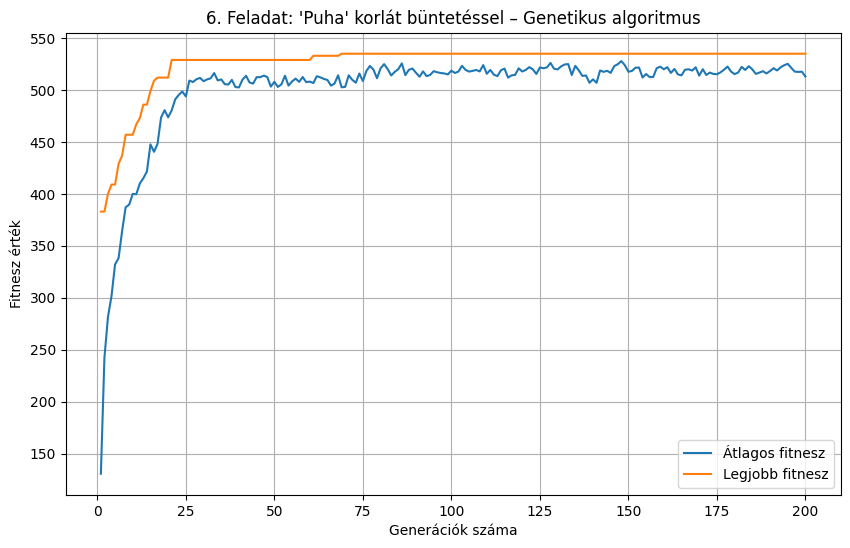

In [33]:
import random
import matplotlib.pyplot as plt

N = 50
weights = [random.randint(1, 10) for _ in range(N)]
values  = [random.randint(5, 25) for _ in range(N)]

capacity = int(sum(weights) * 0.4)

generations = 200
pop_size = 50
p_cross = 0.9
p_mut = 0.01
elit = 5
lambda_penalty = 10
# rnd = random.Random(42)

def fitness(x):
    total_weight = sum(w * xi for w, xi in zip(weights, x))
    total_value  = sum(v * xi for v, xi in zip(values, x))

    penalty = lambda_penalty * max(0, total_weight - capacity)

    return total_value - penalty

def random_solution():
    return [rnd.randint(0, 1) for _ in range(N)]

def crossover(a, b):
    c1 = [a[i] if rnd.random() < 0.5 else b[i] for i in range(N)]
    c2 = [b[i] if rnd.random() < 0.5 else a[i] for i in range(N)]
    return c1, c2

def mutate(x):
    return [1 - xi if rnd.random() < p_mut else xi for xi in x]

def tournament_select(pop, k=2):
    candidates = [rnd.choice(pop) for _ in range(k)]
    return max(candidates, key=lambda ind: ind["fit"])

pop = []
for _ in range(pop_size):
    solution = random_solution()
    pop.append({"x": solution, "fit": fitness(solution)})

avg_history, best_history = [], []

for g in range(generations):
    fits = [ind["fit"] for ind in pop]
    avg_history.append(sum(fits) / len(fits))
    best_history.append(max(fits))

    elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit]

    newpop = []
    children_to_generate = pop_size - elit
    while len(newpop) < children_to_generate:
        p1 = tournament_select(pop)
        p2 = tournament_select(pop)
        if rnd.random() < p_cross:
            c1, c2 = crossover(p1["x"], p2["x"])
        else:
            c1, c2 = p1["x"][:], p2["x"][:]

        c1 = mutate(c1)
        newpop.append({"x": c1, "fit": fitness(c1)})

        if len(newpop) < children_to_generate:
            c2 = mutate(c2)
            newpop.append({"x": c2, "fit": fitness(c2)})

    pop = newpop + elites

best_ga_solution = max(pop, key=lambda ind: ind["fit"])
best_ga_weight = sum(w * best_ga_solution["x"][i] for i, w in enumerate(weights))
best_ga_value = sum(v * best_ga_solution["x"][i] for i, v in enumerate(values))

print("--- Genetikus algoritmus eredménye (6. Feladat) ---")
print("Legjobb érték (fitness):", best_ga_solution["fit"])
print(f"Összsúly: {best_ga_weight} / {capacity}")
print(f"Összérték (korrekció nélkül): {best_ga_value}")

weight_difference = best_ga_weight - capacity
if weight_difference > 0:
    print(f"Kapacitás túllépés: {weight_difference}")
else:
    print(f"Kapacitás kihasználtság: {(-weight_difference / capacity) * 100:.2f}% a fennmaradó kapacitás a maxból.")

plt.figure(figsize=(10, 6))
plt.plot(range(1, generations + 1), avg_history, label="Átlagos fitnesz")
plt.plot(range(1, generations + 1), best_history, label="Legjobb fitnesz")
plt.xlabel("Generációk száma")
plt.ylabel("Fitnesz érték")
plt.title("6. Feladat: 'Puha' korlát büntetéssel – Genetikus algoritmus")
plt.legend()
plt.grid(True)
plt.show()

# Ellenőrző feladatok:
* Írd le, milyen kromoszóma-kódolást használsz (0/1, 0/1/2, többdimenziós).
* Mutasd meg 3 futás átlagát és szórását (más random seed).
* Készíts érzékenységi vizsgálatot: pm ∈ {0.005, 0.01, 0.02}, pc ∈ {0.8, 0.9}, elit ∈ {2,4,6}.
* Hasonlíts a greedy heurisztikához és írd le, mikor gyengébb/erősebb a GA.
* (2D/penalty) Rajzold meg, hogyan változik a legjobb megoldás a kapacitás növelésével (C-sweep).

## Kromoszóma-kódolás az egyes feladatokban

Az alábbiakban összefoglalom a megoldott feladatokban használt kromoszóma-kódolásokat:

*   **1. Feladat**: 0/1 bináris vektor kódolás.

*   **2. Feladat:** 0/1 bináris vektor kódolás.

*   **3. Feladat**: 0/1 bináris vektor kódolás.

*   **4. Feladat**: 0/1/2 egész értékű vektor kódolás.

*   **5. Feladat**: 0/1 bináris vektor kódolás.

*   **6. Feladat**: 0/1 bináris vektor kódolás.


In [42]:
#Egyszerű átlag és szórás-számoló
import numpy as np

data = [364, 355, 355]

average = np.mean(data)
std_dev = np.std(data)
print(f"Adatok: {data}")
print(f"Átlag: {average:.2f}")
print(f"Szórás: {std_dev:.2f}")

Adatok: [364, 355, 355]
Átlag: 358.00
Szórás: 4.24


## Futtatás 3 különböző random seed-el

Seed-ek: 42, 43, 44

*   **1. Feladat**: 192, 192, 192
    * Átlag: 192
    * Szórás: 0

*   **2. Feladat:** 299, 308, 286
    * Átlag: 297.67
    * Szórás: 9.03

*   **3. Feladat**: 170, 176, 144
    * Átlag: 163.33
    * Szórás: 13.89
*   **4. Feladat**: 384, 432, 420
    * Átlag: 412
    * Szórás: 20.4

*   **5. Feladat**: 364, 355, 355
    * Átlag: 358
    * Szórás: 4.24

*   **6. Feladat**: 471, 492, 535
    * Átlag: 499.33
    * Szórás: 26.64

## Érzékenységi vizsgálat
Csak a második feladathoz írtam meg ezt, mert úgy gondoltam, hogy az látványosabb eredményt mutat, mint a többi feladat.

In [61]:
import random
import matplotlib.pyplot as plt

N = 60
generations = 150
pop_size = 60

rnd = random.Random(42)
weights = [rnd.randint(1, 15) for _ in range(N)]
values  = [weights[i] + rnd.randint(0, 5) for i in range(N)]
capacity_ = int(0.40 * sum(weights))

def fitness(x, current_weights, current_values, current_capacity):
    total_weight = sum(w * xi for w, xi in zip(current_weights, x))
    total_value  = sum(v * xi for v, xi in zip(current_values, x))
    if total_weight <= current_capacity:
        return total_value
    else:
        return 0

def run_ga_for_sensitivity(p_cross_val, p_mut_val, elit_val):

    def random_solution_local():
        return [rnd.randint(0, 1) for _ in range(N)]

    def crossover_local(a, b):
        cp = rnd.randint(1, N - 1)
        return a[:cp] + b[cp:], b[:cp] + a[cp:]

    def mutate_local(x):
        return [1 - xi if rnd.random() < p_mut_val else xi for xi in x]

    def tournament_select_local(pop, k=2):
        candidates = [rnd.choice(pop) for _ in range(k)]
        return max(candidates, key=lambda ind: ind["fit"])

    pop = [{"x": random_solution_local()} for _ in range(pop_size)]
    for ind in pop:
        ind["fit"] = fitness(ind["x"], weights, values, capacity)

    for g in range(generations):
        elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit_val]

        newpop = []
        children_to_generate = pop_size - elit_val
        while len(newpop) < children_to_generate:
            p1 = tournament_select_local(pop)
            p2 = tournament_select_local(pop)

            if rnd.random() < p_cross_val:
                c1, c2 = crossover_local(p1["x"], p2["x"])
            else:
                c1, c2 = list(p1["x"]), list(p2["x"]) # Másolat készítése

            c1 = mutate_local(c1)
            newpop.append({"x": c1, "fit": fitness(c1, weights, values, capacity)})

            if len(newpop) < children_to_generate:
                c2 = mutate_local(c2)
                newpop.append({"x": c2, "fit": fitness(c2, weights, values, capacity)})

        pop = newpop + elites

    best = max(pop, key=lambda ind: ind["fit"])
    return best["fit"]

p_mut_vals = [0.005, 0.01, 0.02]
p_cross_vals = [0.8, 0.9]
elit_vals = [2, 4, 6]

results_task2 = []

print("--- Érzékenységi analízis futtatása a 2. feladat paramétereihez ---")
print(f"  Rögzített tárgyak száma (N): {N}")
print(f"  Rögzített kapacitás: {capacity}")
print(f"  Rögzített generációk száma: {generations}")
print(f"  Rögzített populációméret: {pop_size}")
print(f"  Vizsgált p_mut értékek: {p_mut_vals}")
print(f"  Vizsgált p_cross értékek: {p_cross_vals}")
print(f"  Vizsgált elit értékek: {elit_vals}")
print("-" * 70)
print(f"{'p_mut':<8} {'p_cross':<8} {'elit':<5} {'Legjobb Fitnesz':<18}")
print(f"{'-'*8} {'-'*8} {'-'*5} {'-'*18}")

for pm in p_mut_vals:
    for pc in p_cross_vals:
        for el in elit_vals:
            best_fitness_for_run = run_ga_for_sensitivity(pc, pm, el)
            results_task2.append({"p_mut": pm, "p_cross": pc, "elit": el, "best_fitness": best_fitness_for_run})
            print(f"{pm:<8.3f} {pc:<8.1f} {el:<5} {best_fitness_for_run:<18}")

print("\n--- Érzékenységi analízis eredményeinek összefoglalása (Legjobb Fitnesz szerint rendezve) ---")
for res in sorted(results_task2, key=lambda x: x["best_fitness"], reverse=True):
    print(f"p_mut: {res['p_mut']:.3f}, p_cross: {res['p_cross']:.1f}, elit: {res['elit']}, Legjobb Fitnesz: {res['best_fitness']}")

--- Érzékenységi analízis futtatása a 2. feladat paramétereihez ---
  Rögzített tárgyak száma (N): 60
  Rögzített kapacitás: 170
  Rögzített generációk száma: 150
  Rögzített populációméret: 60
  Vizsgált p_mut értékek: [0.005, 0.01, 0.02]
  Vizsgált p_cross értékek: [0.8, 0.9]
  Vizsgált elit értékek: [2, 4, 6]
----------------------------------------------------------------------
p_mut    p_cross  elit  Legjobb Fitnesz   
-------- -------- ----- ------------------
0.005    0.8      2     280               
0.005    0.8      4     276               
0.005    0.8      6     279               
0.005    0.9      2     281               
0.005    0.9      4     272               
0.005    0.9      6     277               
0.010    0.8      2     283               
0.010    0.8      4     284               
0.010    0.8      6     290               
0.010    0.9      2     290               
0.010    0.9      4     288               
0.010    0.9      6     282               
0.020    0.8 

**Genetikus Algoritmus (GA) – mikor jó?**

* Összetett problémák: Akkor a legjobb, ha a feladatnak sok lehetséges megoldása van, és a "legjobbnak tűnő" lépések nem mindig vezetnek a valóban legjobb végeredményhez. Képes "gondolkodni" a jövőn, és váratlan, de hatékony kombinációkat találni.
* Globális megoldás közelítése: Jól megközelíti az igazi legjobb megoldást, még ha nem is garantálja azt.

**Mohó (Greedy) Heurisztika – mikor jó?**

* Egyszerű problémák és gyorsaság: Akkor a legjobb, ha a helyi "legjobb" döntések egyből a globálisan legjobb megoldáshoz vezetnek (például ha a tárgyakat tetszőlegesen oszthatjuk). Rendkívül gyors.
* Időhiány: Ha nincs sok időnk, és egy "elég jó" megoldás is megfelelő.

**Következtetés:**

A *GA* a bonyolultabb esetekben, a *Mohó algoritmus* pedig az egyszerűbb és gyorsaságot igénylő feladatoknál hatékonyabb. A 0/1 hátizsák probléma (ahol egy tárgyat vagy bepakolunk, vagy nem) általában a GA-nak kedvez, mert a mohó algoritmus könnyen hibázhat egy-egy "átverős" tárgy miatt.

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

N = 30
rnd_global = random.Random(42)

weights = [1 if i % 2 == 0 else 10 for i in range(N)]
values  = [10 if i % 2 == 0 else 1  for i in range(N)]

sum_weights = sum(weights)
capacity_values = np.linspace(int(0.1 * sum_weights), int(1.0 * sum_weights), 20, dtype=int)

generations = 100
pop_size = 40
p_cross = 0.85
p_mut = 0.015
elit = 4

repeats = 5

penalty_coeff = max(values) * 2

def random_solution(rnd, N):
    return [rnd.randint(0,1) for _ in range(N)]

def crossover(a, b, rnd):
    cp = rnd.randint(1, len(a)-1)
    return a[:cp] + b[cp:], b[:cp] + a[cp:]

def mutate(x, p_mut, rnd):
    return [1 - xi if rnd.random() < p_mut else xi for xi in x]

def run_ga_once(weights, values, capacity, generations, pop_size, p_cross, p_mut, elit, penalty=None, seed=0):
    rnd = random.Random(seed)
    N = len(weights)
    def fitness(x):
        total_weight = sum(w * xi for w, xi in zip(weights, x))
        total_value  = sum(v * xi for v, xi in zip(values, x))
        if penalty is None:
            return total_value if total_weight <= capacity else 0
        else:
            overweight = max(0, total_weight - capacity)
            return total_value - penalty * overweight

    pop = [{"x": random_solution(rnd, N)} for _ in range(pop_size)]
    for ind in pop:
        ind["fit"] = fitness(ind["x"])

    for g in range(generations):
        elites = sorted(pop, key=lambda ind: ind["fit"], reverse=True)[:elit]
        newpop = []
        while len(newpop) < pop_size - elit:
            p1 = max([rnd.choice(pop) for _ in range(2)], key=lambda ind: ind["fit"])
            p2 = max([rnd.choice(pop) for _ in range(2)], key=lambda ind: ind["fit"])
            if rnd.random() < p_cross:
                c1, c2 = crossover(p1["x"], p2["x"], rnd)
            else:
                c1, c2 = p1["x"][:], p2["x"][:]
            c1, c2 = mutate(c1, p_mut, rnd), mutate(c2, p_mut, rnd)
            newpop.append({"x": c1, "fit": fitness(c1)})
            if len(newpop) < pop_size - elit:
                newpop.append({"x": c2, "fit": fitness(c2)})
        pop = newpop + elites

    best_ind = max(pop, key=lambda ind: ind["fit"])
    feasible = [ind for ind in pop if sum(w*xi for w, xi in zip(weights, ind["x"])) <= capacity]
    if feasible:
        best_feasible = max(feasible, key=lambda ind: sum(v*xi for v, xi in zip(values, ind["x"])))
        best_feasible_value = sum(v*xi for v, xi in zip(values, best_feasible["x"]))
        best_feasible_weight = sum(w*xi for w, xi in zip(weights, best_feasible["x"]))
        best_feasible_count = sum(best_feasible["x"])
    else:
        best_feasible_value = None
        best_feasible_weight = None
        best_feasible_count = None

    best_penalized_value = best_ind["fit"]
    best_penalized_weight = sum(w*xi for w, xi in zip(weights, best_ind["x"]))
    best_penalized_count = sum(best_ind["x"])

    return {
        "best_penalized_value": best_penalized_value,
        "best_penalized_weight": best_penalized_weight,
        "best_penalized_count": best_penalized_count,
        "best_feasible_value": best_feasible_value,
        "best_feasible_weight": best_feasible_weight,
        "best_feasible_count": best_feasible_count,
        "best_individual": best_ind["x"]
    }

results = []
for C in capacity_values:
    best_feasible_vals = []
    best_penalized_vals = []
    best_penalized_weights = []
    best_penalized_counts = []
    best_feasible_weights = []
    best_feasible_counts = []
    for r in range(repeats):
        seed = int(C) * 100 + r
        res = run_ga_once(weights, values, capacity=C,
                          generations=generations, pop_size=pop_size,
                          p_cross=p_cross, p_mut=p_mut, elit=elit,
                          penalty=penalty_coeff, seed=seed)
        if res["best_feasible_value"] is not None:
            best_feasible_vals.append(res["best_feasible_value"])
            best_feasible_weights.append(res["best_feasible_weight"])
            best_feasible_counts.append(res["best_feasible_count"])
        best_penalized_vals.append(res["best_penalized_value"])
        best_penalized_weights.append(res["best_penalized_weight"])
        best_penalized_counts.append(res["best_penalized_count"])

    agg = {
        "capacity": C,
        "best_feasible_max": max(best_feasible_vals) if best_feasible_vals else np.nan,
        "best_feasible_mean": np.mean(best_feasible_vals) if best_feasible_vals else np.nan,
        "best_feasible_weight_mean": np.mean(best_feasible_weights) if best_feasible_weights else np.nan,
        "best_feasible_count_mean": np.mean(best_feasible_counts) if best_feasible_counts else np.nan,
        "best_penalized_max": max(best_penalized_vals),
        "best_penalized_mean": np.mean(best_penalized_vals),
        "best_penalized_weight_mean": np.mean(best_penalized_weights),
        "best_penalized_count_mean": np.mean(best_penalized_counts)
    }
    results.append(agg)

#Ábrázolás
caps = [r["capacity"] for r in results]
feas_max = [r["best_feasible_max"] for r in results]
feas_mean = [r["best_feasible_mean"] for r in results]
pen_max = [r["best_penalized_max"] for r in results]
pen_mean = [r["best_penalized_mean"] for r in results]
feas_count = [r["best_feasible_count_mean"] for r in results]

plt.figure(figsize=(10,6))
plt.plot(caps, feas_max, label='Legjobb érvényes (max a repeat-ekből)', marker='o')
plt.plot(caps, pen_max,  label='Legjobb (penalty fitness)', marker='x')
plt.plot(caps, feas_mean, label='Legjobb érvényes (átlag)', linestyle='--')
plt.xlabel('Kapacitás (C)')
plt.ylabel('Fitnesz (összérték vagy penalizált érték)')
plt.title('C-sweep: legjobb megoldások változása a kapacitással')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(caps, feas_count, label='Átlag kiválasztott elemek (feasible)', marker='s')
plt.xlabel('Kapacitás (C)')
plt.ylabel('Kiválasztott elemek száma')
plt.title('Kiválasztott elemek száma a kapacitás függvényében')
plt.grid(True)
plt.show()
